# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings

In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)
        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['date'].unique():
            day_data = month_df[month_df['date'] == date]
            # Iterate through each hour of the selected date
            for hour in day_data['hour'].unique():
                hour_data = day_data[day_data['hour'] == hour]
                # Sample 5% of the hourly data randomly
                if len(hour_data) > 0:
                    # add data of this hour to the dataframe
                    sample = hour_data.sample(frac = 0.05, random_state = 42)
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [91]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('output.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [4]:
# Load the new data file
df = pd.read_parquet('output.parquet')

In [6]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [8]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

# store_and_fwd_flag seems not required as it is not useful for further analysis. We can drop that column
df.drop(columns=['store_and_fwd_flag'], inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [9]:
# Combine the two airport fee columns
df["airport_fee"] = df[["airport_fee", "Airport_fee"]].max(axis=1)
df.drop(columns=["Airport_fee"], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [10]:
# check where values of fare amount are negative
negative_fares = df[df["fare_amount"] < 0]
print(negative_fares[["fare_amount", "RatecodeID"]])

Empty DataFrame
Columns: [fare_amount, RatecodeID]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [11]:
# Analyse RatecodeID for the negative fare amounts

print("No negative rows for fare amounts found in the dataset. Hence no RatecodeID analysis for negative fare amount can be performed.\n",
"There are discrepencies in RatecodeID as per Data Dictionary which will be corrected in further code")

No negative rows for fare amounts found in the dataset. Hence no RatecodeID analysis for negative fare amount can be performed.
 There are discrepencies in RatecodeID as per Data Dictionary which will be corrected in further code


In [12]:
# Find which columns have negative values
#Listing all columns having money value except fare amount since it was already addresed before
money_columns = ['extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','airport_fee']
negative_value = (df[money_columns] < 0).any()
print(negative_value[negative_value].index.tolist())
negative_list = negative_value[negative_value].index.tolist()

['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [13]:
# fix these negative values. Best way isto change them to NaN.
for columns in negative_list:
    match = df[columns] <0 
    df.loc[match, columns] = np.nan

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [14]:
# Find the proportion of missing values in each column
missing_value = df.isnull().mean() * 100
print(missing_value[missing_value > 0])

passenger_count          3.420903
RatecodeID               3.420903
extra                    0.000158
mta_tax                  0.003849
improvement_surcharge    0.004113
total_amount             0.004113
congestion_surcharge     3.423856
airport_fee              3.421694
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [15]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.fillna({'passenger_count':df['passenger_count'].mode()[0]}, inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [16]:
median_of_passenger = df['passenger_count'].median()
df.loc[df['passenger_count'] == 0,'passenger_count'] = median_of_passenger

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [17]:
# Fix missing values in 'RatecodeID'
df.fillna({'RatecodeID':df['RatecodeID'].mode()[0]}, inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [18]:
# handle null values in congestion_surcharge

df.fillna({'congestion_surcharge':df['congestion_surcharge'].median()}, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [19]:
# Handle any remaining missing values
#Printing missing null columns
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]
print(missing_cols)


extra                        3
mta_tax                     73
improvement_surcharge       78
total_amount                78
airport_fee              64889
dtype: int64


In [20]:
# Based on above data, we will fix extra, mta_tax improvment surcharge and total amount
df.fillna({'extra': df['extra'].median()}, inplace=True)

mode_mta_tax = df['mta_tax'].mode()[0]
df.fillna({'mta_tax': mode_mta_tax}, inplace=True)

df.fillna({'improvement_surcharge': df['improvement_surcharge'].median()}, inplace=True)

df.fillna({'total_amount': df['total_amount'].median()}, inplace=True)

#Fixing null for airports can be done by using ratecode ID. Since only JFK ratecode is given, we can fill those rows with data dictionary
# value of 1.25, else 0
check_airport_fee = df['airport_fee'].isna()
df.loc[check_airport_fee & (df['RatecodeID'] == 2), 'airport_fee'] = 1.25
df.loc[check_airport_fee & (df['RatecodeID'] != 2), 'airport_fee'] = 0

In [21]:
#Printing missing null columns again
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]
print(missing_cols)

Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [22]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print(df.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930796  2023-07-02 20:17:18.919562   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.372236e+00   3.858293e+00  1.612981e+00  1.652814e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [23]:
# remove passenger_count > 6
df = df[df['passenger_count']<= 6]

In [24]:
# Continue with outlier handling

df = df[~((df['trip_distance']< 1) & (df['fare_amount']> 300))]
df = df[~((df['trip_distance']== 0) & (df['fare_amount']== 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance']< 250]

In [25]:
# Do any columns need standardising?
# We identify which columns which are categorical are not as per data dictionary
invalid_vendor_count = len(df[~df['VendorID'].isin([1, 2])])
invalid_ratecode_count = len(df[~df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])])
invalid_payment_count = len(df[~df['payment_type'].isin([1, 2, 3, 4])])

# Print counts
print(f"Number of rows with invalid VendorID: {invalid_vendor_count}")
print(f"Number of rows with invalid RatecodeID: {invalid_ratecode_count}")
print(f"Number of rows with invalid payment_type: {invalid_payment_count}")

Number of rows with invalid VendorID: 444
Number of rows with invalid RatecodeID: 10462
Number of rows with invalid payment_type: 64844


In [26]:
#Since invalid vendor id row are less, we can drop them , for RatecodeID and payment type we can impute with mode
#Drop invalid vendors id
df = df[df['VendorID'].isin([1, 2])]

# Replace RatecodeID with mode where it is not as per data dictionary
ratecode_mode = df['RatecodeID'].mode()[0]
df.loc[~df['RatecodeID'].isin([1, 2, 3, 4, 5, 6]),'RatecodeID'] = ratecode_mode

#Do the same for payment type
payment_mode = df['payment_type'].mode()[0]
df.loc[~df['payment_type'].isin([1, 2, 3, 4]),'payment_type'] = payment_mode

In [28]:
# we can remove trips where fare_amount is zero but payment_type is in Cash or Card
zero_fares = len(df[(df['fare_amount'] == 0) & (df['payment_type'].isin([1, 2]))])
print(f"Number of trips with zero fare but invalid payment type: {zero_fares}")
df = df[~((df['fare_amount'] == 0) & (df['payment_type'].isin([1, 2])))]


# we can remove trips where dropoff time is before pickup time
wrong_duration = len(df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']])
print(f"Number of trips where dropoff time is before pickup time: {wrong_duration}")
df = df[df['tpep_dropoff_datetime'] >= df['tpep_pickup_datetime']]

Number of trips with zero fare but invalid payment type: 0
Number of trips where dropoff time is before pickup time: 0


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [29]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Ans:

- VendorID: Categorical
- tpep_pickup_datetime: Numerical
- tpep_dropoff_datetime: Numerical
- passenger_count: Numerical
- trip_distance: Numerical
- RatecodeID: Categorical
- PULocationID: Categorical
- DOLocationID: Categorical
- payment_type: Categorical
- pickup_hour: Numerical
- trip_duration: Numerical


Monetary Parameters:
All the  monetary parameters belong in the same category, and they are Numerical.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

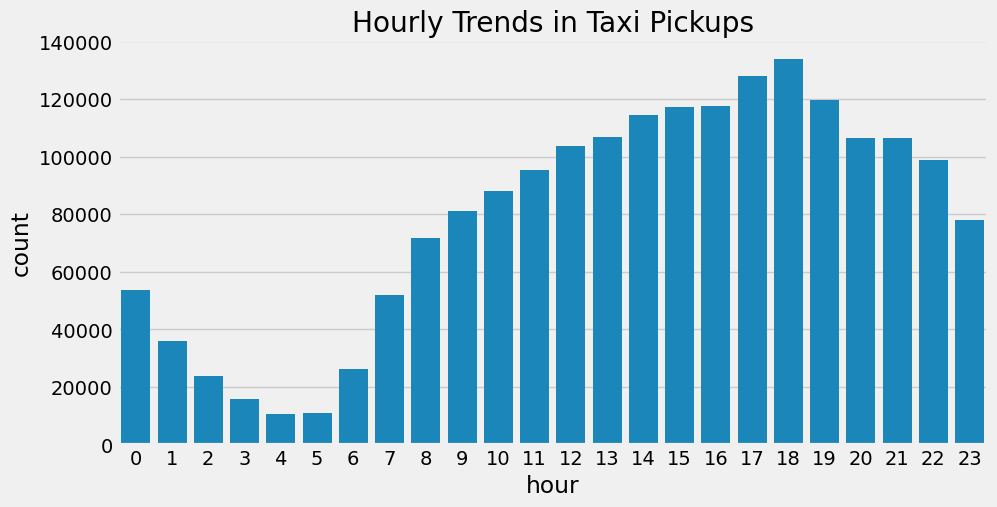

In [30]:
# Find and show the hourly trends in taxi pickups\
plt.style.use("fivethirtyeight")

df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['month'] = df['tpep_pickup_datetime'].dt.month

plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df)
plt.title("Hourly Trends in Taxi Pickups")
plt.show()

In [31]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week', data=df)
plt.title("Daily Trends in Taxi Pickups")
plt.show()

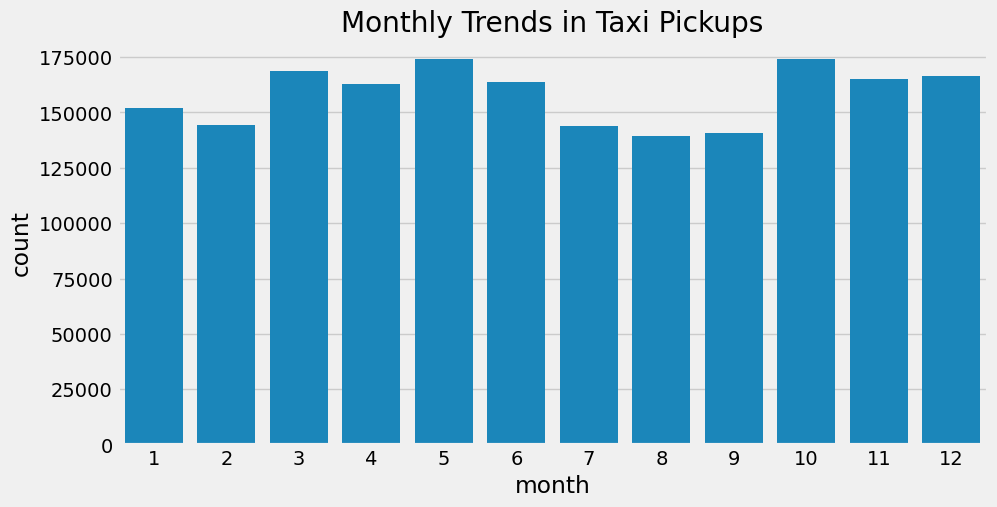

In [32]:
# Show the monthly trends in pickups
# Group by month and count pickups
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df)
plt.title("Monthly Trends in Taxi Pickups")
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [33]:
# Analyse the above parameters

print("negative fare_amount:", (df['fare_amount'] < 0).sum(), "rows")
print("negative tip_amount:", (df['tip_amount'] < 0).sum(), "rows")
print("negative total_amount:", (df['total_amount'] < 0).sum(), "rows")
print("negative trip_distance:", (df['trip_distance'] < 0).sum(), "rows")

print("0 fare_amount:", (df['fare_amount'] == 0).sum(), "rows")
print("0 tip_amount:", (df['tip_amount'] == 0).sum(), "rows")
print("0 total_amount:", (df['total_amount'] == 0).sum(), "rows")
print("0 trip_distance:", (df['trip_distance'] == 0).sum(), "rows")


negative fare_amount: 0 rows
negative tip_amount: 0 rows
negative total_amount: 0 rows
negative trip_distance: 0 rows
0 fare_amount: 226 rows
0 tip_amount: 435043 rows
0 total_amount: 121 rows
0 trip_distance: 37456 rows


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [34]:
# Create a df with non zero entries for the selected parameters.
# First we can drop 0 cases in financial param. But removing tip_amount as 0 will remove lot of data. Ideally tip amount can be 0 and hence we should
#not consider that in our filtering criteria
df_new = df[(df['fare_amount'] > 0) & (df['total_amount'] > 0)]

# Now we should only drop 0 distances if pickup and drop zone are different. For same pickup and drop zone the distance can be 0 
# and it will be still a valid ride
df_new = df_new[~((df_new['trip_distance'] == 0) & (df_new['PULocationID'] != df_new['DOLocationID']))]



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [35]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_new.groupby('month')['total_amount'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

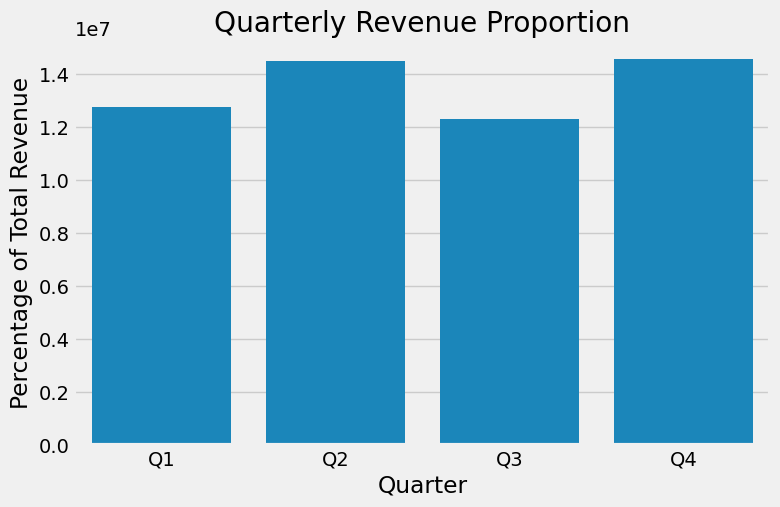

In [36]:
# Calculate proportion of each quarter
df_new['quarter'] = (df_new['month'] - 1) // 3 + 1
quarterly_rev = df_new.groupby('quarter')['total_amount'].sum()

quarterly_pptn = (quarterly_rev / quarterly_rev.sum()) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=quarterly_pptn.index, y=quarterly_rev.values)
plt.title("Quarterly Revenue Proportion")
plt.xlabel("Quarter")
plt.ylabel("Percentage of Total Revenue")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Q1", "Q2", "Q3", "Q4"])
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

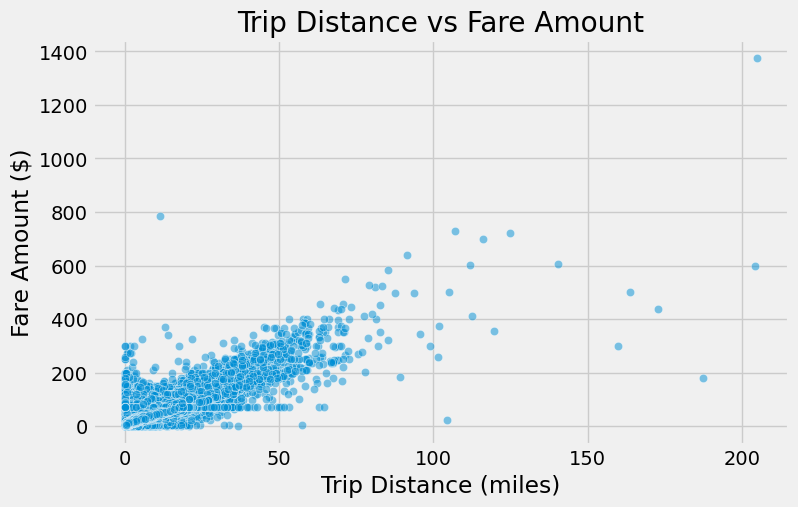

Correlation between trip distance and fare amount: 0.94


In [37]:
# Show how trip fare is affected by distance
df_no_zero_distance = df_new[df_new['trip_distance'] > 0]
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_no_zero_distance['trip_distance'], y=df_no_zero_distance['fare_amount'], alpha=0.5)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()
correlation_distance_fare = df_no_zero_distance['trip_distance'].corr(df_no_zero_distance['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation_distance_fare:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

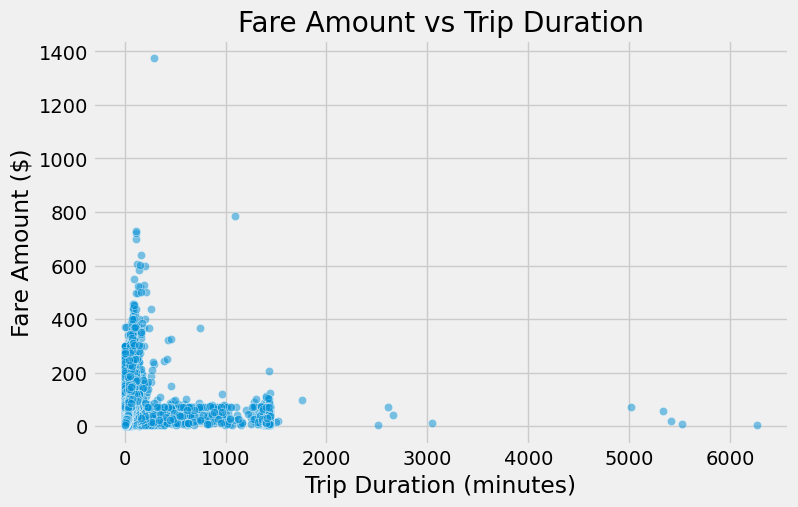

Correlation between fare amount and trip duration: 0.27


In [38]:
# Show relationship between fare and trip duration
df_new['trip_duration'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_new['trip_duration'], y=df_new['fare_amount'], alpha=0.5)
plt.title("Fare Amount vs Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.show()

correlation_fare_duration = df_new['trip_duration'].corr(df_new['fare_amount'])
print(f"Correlation between fare amount and trip duration: {correlation_fare_duration:.2f}")


In [39]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_new['passenger_count'], y=df_new['fare_amount'], alpha=0.5)

plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.xticks(range(1, 6))  # Ensure proper category labels
plt.show()

correlation_fare_passengers = df_new['passenger_count'].corr(df_new['fare_amount'])
print(f"Correlation between fare amount and passenger count: {correlation_fare_passengers:.2f}")

Correlation between fare amount and passenger count: 0.04


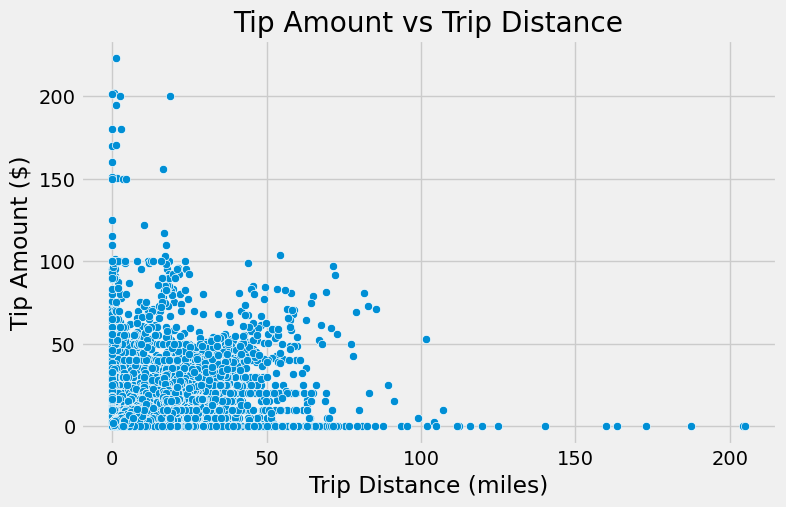

Correlation between tip amount and trip distance: 0.57


In [40]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_new['trip_distance'], y=df_new['tip_amount'])
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.show()

correlation_tip_distance = df_new['trip_distance'].corr(df_new['tip_amount'])
print(f"Correlation between tip amount and trip distance: {correlation_tip_distance:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [41]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df_new['payment_type'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Credit Card", "Cash", "No Charge", "Dispute"])
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [239]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/16.2 MB 10.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.7/16.2 MB 8.7 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/16.2 MB 8.0 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.2 MB 7.4 MB/s eta 0:00:02
   ---------------- ----------------------- 6.8/16.2 MB 7.4 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.2 MB 6.4 MB/s eta 0:00:02
   -------------------- ------------------- 8.4/16.2 MB 5.5 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.2 MB 5.8 MB/s eta 0:00:02
   ----------------------------- ---------- 11.8/16.2 MB 6.2 MB/s eta 0:00:01
   ---------------------------------- ----- 13.9/16.2 MB 6.5 MB/s eta 0:00:01
   -------------------------------------- - 15.5/16.2 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 6.5 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [42]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [43]:
print(zones.info())
zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [44]:
# Merge zones and trip records using locationID and PULocationID
df_new = df_new.merge(zones[['LocationID', 'zone', 'borough']], left_on="PULocationID", right_on="LocationID", how="left")


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [77]:
# Group data by location and calculate the number of trips
trip_counts = df_new.groupby("PULocationID").size().reset_index(name="trip_count")
trip_counts = trip_counts.sort_values(by="trip_count", ascending=False)
print(trip_counts)

     PULocationID  trip_count
124           132       95145
227           237       87913
153           161       86621
226           236       78945
154           162       66091
..            ...         ...
148           156           1
107           115           1
178           187           1
241           251           1
26             27           1

[256 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [46]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trip_counts, left_on="LocationID", right_on="PULocationID", how="left")
zones["trip_count"] = zones["trip_count"].fillna(0)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [47]:
# Define figure and axis
figure, axis = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column="trip_count",ax=axis,legend=True, cmap="Blues",edgecolor="black",linewidth=0.5,legend_kwds={'label': "Total Trips", 'orientation': "horizontal"})
plt.show()

In [48]:
# can you try displaying the zones DF sorted by the number of trips?

print(zones[['LocationID','trip_count']].sort_values(by="trip_count", ascending=False).head())

     LocationID  trip_count
131         132     96689.0
236         237     88166.0
160         161     86914.0
235         236     79176.0
161         162     66342.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


# Busiest Days, Hours, and Months

## Hours
The hourly distribution (by an hour-by-hour count plot of taxi pickups) indicates that there are definite spikes in ride activity. In general, the early morning (7–9 AM) and evening (5–8 PM) hours have more pickups, which reflect commuter demand.

## Days
Day-of-week analysis indicates that demand is not constant. While weekdays will generally experience higher volumes of pickups with business-related travel, weekends can also experience high volumes with leisure travel.

## Months
Monthly trends indicate variability in the number of pickups. The count plot by months indicates that certain months (perhaps mid-year or year-end) experience increased taxi usage, and this may be due to holiday or seasonal reasons.

---

# Trends in Revenue Collected

## Monthly Revenue
The month-to-month revenue pattern (`total_amount`) reflects revenue collection with pickup volume monitoring—increased taxi activity in months also means increased revenue.

## Quarterly Revenue
Breaking down revenue into quarters shows a mixed pattern. One quarter, for example Q3, can represent a larger share of the annual revenue than the others, depending on past seasonal peaks in demand.

---

# Fare Dependency on Trip Parameters

## Trip Distance vs Fare
A scatter plot of trip distance vs. fare amount shows a highly positive correlation (≈0.94). That is, fare amount increases as distance increases almost linearly.

## Trip Length and Fare
Although fare and trip duration do share a positive correlation (≈0.27), it is much weaker. This is because there may be other variables (e.g., waiting time or traffic) affecting duration independent of distance.

## Passenger Count and Charges
The correlation between fare and passenger number is nearly zero (≈0.04). Therefore, the number of passengers has no effect on the fare, presumably because the fare is predominantly distance-dependent.

## Tip Size and Trip Length
Tip dependence: The distance of the trip and tip size are moderately correlated (≈0.57). It means that trips tend to be larger in size when they are longer, potentially because they consist of longer service time or fare that triggers greater tips.

---

# Busiest Locations

## Geographical Analysis
By including taxi trip histories and zone information, the busiest zones have been determined. Zones with LocationIDs of **132**, **237**, **161**, and **236** are included in the busiest zones. These types of zones may be strategic locations for optimizing fleet deployment.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [78]:
# Find routes which have the slowest speeds at different times of the day
df_new["trip_duration_hours"] = df_new["trip_duration"] / 60
# We will calculate speed (distance / duration)
df_new["speed_mph"] = df_new["trip_distance"] / df_new["trip_duration_hours"]
route_counts = (df_new.groupby(["PULocationID", "DOLocationID", "hour"]).size().reset_index(name="trip_count"))
most_frequent_routes = (route_counts.sort_values(by=["hour", "trip_count"], ascending=[True, False]).groupby("hour").first().reset_index())

route_speed = df_new.groupby(["PULocationID", "DOLocationID", "hour"])["speed_mph"].mean().reset_index()
congested_routes = most_frequent_routes.merge(route_speed, on=["PULocationID", "DOLocationID", "hour"], how="left")

print("Most Frequent Routes Per Hour with Speed")
print(congested_routes)



Most Frequent Routes Per Hour with Speed
    hour  PULocationID  DOLocationID  trip_count  speed_mph
0      0           264           264         370  14.987612
1      1           264           264         225  14.989356
2      2           264           264         191  14.934967
3      3           246            48         119  14.917662
4      4           264           264          73  18.571222
5      5           100           161         155  11.542299
6      6           186           161         295  11.351376
7      7           236           161         451  14.613529
8      8           236           161         564   9.562941
9      9           236           237         686   9.798967
10    10           236           237         777   8.973464
11    11           236           237         959   7.064561
12    12           236           237        1038   7.258250
13    13           237           236         902   8.693894
14    14           237           236        1125   7.995237

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [50]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = df_new.groupby("hour").size().reset_index(name="trip_count")
plt.figure(figsize=(10, 5))
plt.bar(hourly_trips["hour"], hourly_trips["trip_count"], color="skyblue")
plt.title("Number of Trips per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [51]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
hourly_trips["actual_trips"] = hourly_trips["trip_count"]/sample_fraction
busiest_five_hours = hourly_trips.nlargest(5, "actual_trips")
print(busiest_five_hours[["hour", "actual_trips"]])

    hour  actual_trips
18    18     2645700.0
17    17     2525920.0
19    19     2365900.0
16    16     2327160.0
15    15     2325600.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [52]:
# Compare traffic trends for the week days and weekends
weekday_data = df_new[df_new["day_of_week"] < 5].groupby("hour").size().reset_index(name="trip_count")
weekend_data = df_new[df_new["day_of_week"] >= 5].groupby("hour").size().reset_index(name="trip_count")

plt.figure(figsize=(10, 5))
sns.lineplot(x="hour", y="trip_count", data=weekday_data, label="Weekdays")
sns.lineplot(x="hour", y="trip_count", data=weekend_data, label="Weekends")
plt.title("Hourly Traffic: Weekday vs Weekend")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

### Inference

- Understanding busy hours can allow us better allocation of taxis and drivers. We can have more taxis deployed during peak times and fewer taxis deployed during quiet hours. This will optimize operational efficiency.
  
- Drivers can be scheduled according to demand patterns. This will ensure that they work during high-demand periods andhave off-hours during quieter times.


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [53]:
# Find top 10 pickup and dropoff zones

pickup_counts = df_new.groupby(["hour", "PULocationID"]).size().reset_index(name="pickup_count")
top10_pickups = pickup_counts.sort_values("pickup_count", ascending=False).head(10)
print("Top 10 pickup zones (hourly):")
print(top10_pickups)

dropoff_counts = df_new.groupby(["hour", "DOLocationID"]).size().reset_index(name="dropoff_count")
top10_dropoffs = dropoff_counts.sort_values("dropoff_count", ascending=False).head(10)
print("\nTop 10 dropoff zones (hourly):")
print(top10_dropoffs)

Top 10 pickup zones (hourly):
      hour  PULocationID  pickup_count
3804    18           161          7548
3595    17           161          7266
3349    16           132          6760
3132    15           132          6718
3375    16           161          6708
3661    17           237          6700
3001    14           237          6695
4533    22           132          6694
3864    18           237          6685
3221    15           237          6613

Top 10 dropoff zones (hourly):
      hour  DOLocationID  dropoff_count
3572    14           236           6209
4571    18           237           6203
3821    15           236           6188
4570    18           236           6098
3076    12           237           6071
4323    17           236           5963
3822    15           237           5960
4324    17           237           5839
4073    16           236           5770
3573    14           237           5766


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [54]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zone_pickups = df_new["PULocationID"].value_counts()
zone_dropoffs = df_new["DOLocationID"].value_counts()
pickup_drop_ratio = zone_pickups / zone_dropoffs

# Highest ratios
highest_ratios = pickup_drop_ratio.nlargest(10)
print("Top 10 Pickup/Dropoff Ratios:")
print(highest_ratios)

# Lowest ratios
lowest_ratios = pickup_drop_ratio.nsmallest(10)
print("\nBottom 10 Pickup/Dropoff Ratios:")
print(lowest_ratios)

Top 10 Pickup/Dropoff Ratios:
70     8.427273
132    4.277896
138    2.631131
186    1.564490
114    1.375798
43     1.370033
249    1.330269
162    1.245672
161    1.188470
100    1.188244
Name: count, dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
27     0.026316
221    0.028571
245    0.032258
1      0.035490
115    0.043478
257    0.045802
46     0.061224
128    0.062500
200    0.065079
96     0.065574
Name: count, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [55]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]
night_data = df_new[df_new["hour"].isin(night_hours)]

# Top 10 pickup zones at night
night_pickups = night_data["PULocationID"].value_counts().head(10)
print("Top 10 Nighttime Pickup Zones:")
print(night_pickups)

# Top 10 dropoff zones at night
night_dropoffs = night_data["DOLocationID"].value_counts().head(10)
print("\nTop 10 Nighttime Dropoff Zones:")
print(night_dropoffs)


Top 10 Nighttime Pickup Zones:
PULocationID
79     16098
132    14548
249    12871
48     10696
148    10002
114     9013
230     8380
186     7059
164     6344
68      6242
Name: count, dtype: int64

Top 10 Nighttime Dropoff Zones:
DOLocationID
79     8544
48     7098
170    6395
68     6004
107    5851
141    5462
263    5202
249    5050
230    4758
239    4530
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [56]:
# Filter for night hours (11 PM to 5 AM)
# Filter for night hours
night_hr = df_new["hour"].isin([23, 0, 1, 2, 3, 4, 5])
night_revenue = df_new.loc[night_hr, "total_amount"].sum()

# Daytime revenue
day_hr = df_new["hour"].isin([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 , 18, 19, 20, 21, 22])
day_revenue = df_new.loc[day_hr, "total_amount"].sum()

total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {night_share:.2f}%")
print(f"Daytime Revenue Share: {day_share:.2f}%")


Nighttime Revenue Share: 12.26%
Daytime Revenue Share: 87.74%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [57]:
# Analyse the fare per mile per passenger for different passenger counts
#From here onwards we have to remove the rows where trip distance is equal to zero, else we will get infinte as result
df_new = df_new[df_new["trip_distance"] > 0]
df_new["fare_per_mile"] = df_new["fare_amount"] / df_new["trip_distance"]
df_new["fare_per_mile_per_passenger"] = df_new["fare_per_mile"] / df_new["passenger_count"]

fare_pp = df_new.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()
print("Average fare per mile per passenger by passenger count:")
print(fare_pp)


Average fare per mile per passenger by passenger count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.820458
1              2.0                     6.435831
2              3.0                     3.908175
3              4.0                     4.361449
4              5.0                     1.709582
5              6.0                     1.350748


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [58]:
# Compare the average fare per mile for different days and for different times of the day

# Fare per mile
df_new["fare_per_mile"] = df_new["fare_amount"] / df_new["trip_distance"]

# By hour
hourly_fare_pm = df_new.groupby("hour")["fare_per_mile"].mean().reset_index()
print("Average Fare per Mile by Hour:")
print(hourly_fare_pm)

# By day of week
df_new["day_of_week"] = df_new["tpep_pickup_datetime"].dt.dayofweek
daily_fare_pm = df_new.groupby("day_of_week")["fare_per_mile"].mean().reset_index()
print("\nAverage Fare per Mile by Day of Week (Mon=0..Sun=6):")
print(daily_fare_pm)

Average Fare per Mile by Hour:
    hour  fare_per_mile
0      0      10.468562
1      1      11.211494
2      2       9.875171
3      3      10.802813
4      4      13.230628
5      5      13.909209
6      6      11.001566
7      7      10.167220
8      8      10.309637
9      9      10.466920
10    10      10.737679
11    11      10.940635
12    12      12.011694
13    13      11.940190
14    14      11.527942
15    15      12.499584
16    16      13.819409
17    17      11.964088
18    18      11.548496
19    19      11.553411
20    20       9.561251
21    21       9.485656
22    22      10.126075
23    23      10.711672

Average Fare per Mile by Day of Week (Mon=0..Sun=6):
   day_of_week  fare_per_mile
0            0      10.928388
1            1      11.326176
2            2      11.042499
3            3      11.243033
4            4      10.903845
5            5      10.873408
6            6      12.498806


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [59]:
# Compare fare per mile for different vendors

df_new["VendorID"] = df_new["VendorID"].astype(str)  # Just ensure it's consistent

vendor_hour_fare = df_new.groupby(["VendorID", "hour"])["fare_per_mile"].mean().reset_index()

print("Average Fare per Mile by Vendor and Hour:")
print(vendor_hour_fare)

Average Fare per Mile by Vendor and Hour:
   VendorID  hour  fare_per_mile
0         1     0       6.795081
1         1     1       7.055755
2         1     2       6.932000
3         1     3       6.510311
4         1     4       7.498874
5         1     5       6.964830
6         1     6       6.649078
7         1     7       7.193886
8         1     8       8.073629
9         1     9       8.396315
10        1    10       8.413040
11        1    11       8.724571
12        1    12       8.839029
13        1    13       8.734100
14        1    14       8.653598
15        1    15       8.817431
16        1    16       8.832358
17        1    17       8.633487
18        1    18       8.455267
19        1    19       7.922612
20        1    20       7.460851
21        1    21       7.312481
22        1    22       7.008790
23        1    23       6.897692
24        2     0      11.519707
25        2     1      12.401098
26        2     2      10.742354
27        2     3      12.026154
2

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [60]:
# Defining distance tiers
distance_tiers = []
for dist in df_new["trip_distance"]:
    if dist <= 2:
        distance_tiers.append("0-2 miles")
    elif dist <= 5:
        distance_tiers.append("2-5 miles")
    else:
        distance_tiers.append(">5 miles")
df_new["distance_tier"] = distance_tiers
tiered_fare = df_new.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index()
print(tiered_fare)

  VendorID distance_tier  fare_per_mile
0        1     0-2 miles       9.909680
1        1     2-5 miles       6.382525
2        1      >5 miles       4.426744
3        2     0-2 miles      18.007368
4        2     2-5 miles       6.538501
5        2      >5 miles       4.490938


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [61]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_new["tip_percentage"] = (df_new["tip_amount"] / df_new["total_amount"]) * 100

# Tip by distance
distance_tip = df_new.groupby("distance_tier")["tip_percentage"].mean().reset_index()

# Tip by passenger count
passenger_tip = df_new.groupby("passenger_count")["tip_percentage"].mean().reset_index()

# Tip by hour
hour_tip = df_new.groupby("hour")["tip_percentage"].mean().reset_index()

print("Average Tip Percentage by Distance Tier:")
print(distance_tip)
print("\nAverage Tip Percentage by Passenger Count:")
print(passenger_tip)
print("\nAverage Tip Percentage by Hour:")
print(hour_tip)

Average Tip Percentage by Distance Tier:
  distance_tier  tip_percentage
0     0-2 miles       12.130798
1     2-5 miles       12.222109
2      >5 miles       11.293798

Average Tip Percentage by Passenger Count:
   passenger_count  tip_percentage
0              1.0       12.118128
1              2.0       11.787401
2              3.0       11.356503
3              4.0       10.492815
4              5.0       12.133910
5              6.0       12.212127

Average Tip Percentage by Hour:
    hour  tip_percentage
0      0       11.919054
1      1       11.872597
2      2       11.686199
3      3       11.232728
4      4       10.470865
5      5       10.328987
6      6       11.097444
7      7       11.918106
8      8       12.232952
9      9       12.069975
10    10       11.796675
11    11       11.799873
12    12       11.803368
13    13       11.750569
14    14       11.801342
15    15       11.787063
16    16       11.810556
17    17       12.092385
18    18       12.260228
19    19 

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

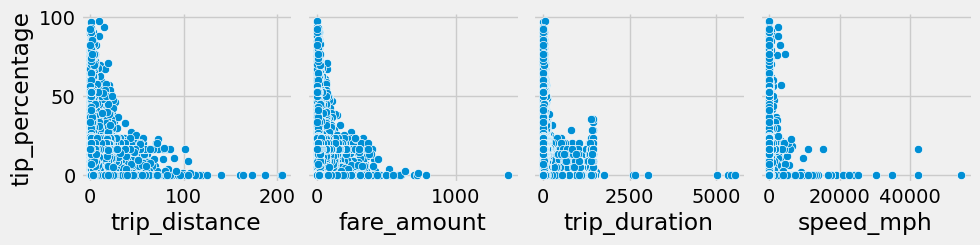

In [62]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip = df_new[df_new["tip_percentage"] < 10]
high_tip = df_new[df_new["tip_percentage"] > 25]

numeric_cols = ["tip_percentage", "trip_distance", "fare_amount", "trip_duration", "speed_mph"]

# Creating the pairplot
sns.pairplot(df_new[numeric_cols], y_vars=["tip_percentage"], x_vars=numeric_cols[1:], diag_kind="kde")
plt.show()

### Based on the data above, it seems that high trip distance, high fare amount, high trip duration and high speed are all showcasing lower tip tendency

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

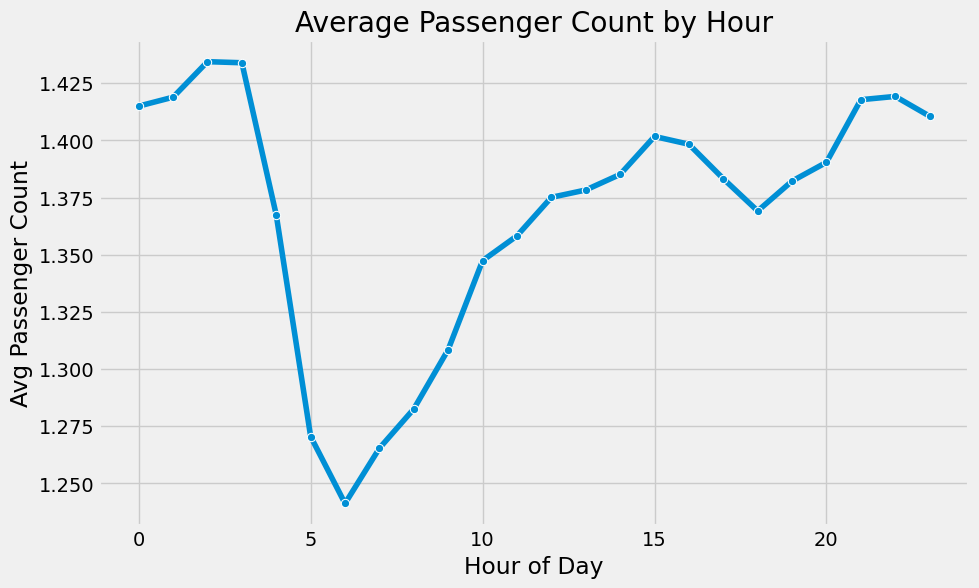

In [70]:
# See how passenger count varies across hours and days

passenger_hour = df_new.groupby("hour")["passenger_count"].mean().reset_index()
passenger_day = df_new.groupby("day_of_week")["passenger_count"].mean().reset_index()

# Variation across hours
plt.figure(figsize=(10, 6))
sns.lineplot(data=passenger_hour, x="hour", y="passenger_count", marker="o")
plt.title("Average Passenger Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Passenger Count")
plt.grid(True)
plt.show()

# Variation across days
plt.figure(figsize=(10, 6))
sns.barplot(data=passenger_day, x="day_of_week", y="passenger_count")
plt.title("Average Passenger Count by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Avg Passenger Count")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

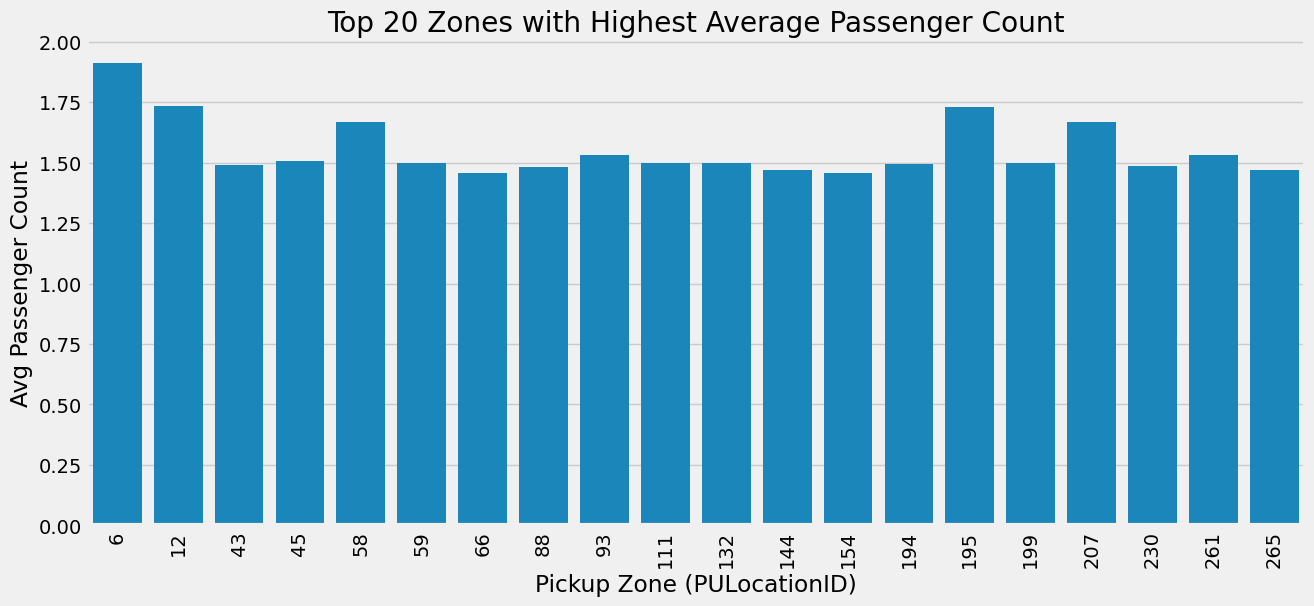

In [71]:
# How does passenger count vary across zones

zone_passenger = df_new.groupby("PULocationID")["passenger_count"].mean().reset_index()
zone_passenger.columns = ["PULocationID", "avg_passenger_count"]
# Sort by average passenger count for better visualization
zone_passenger_sorted = zone_passenger.sort_values(by="avg_passenger_count", ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=zone_passenger_sorted.head(20), x="PULocationID", y="avg_passenger_count")

# Labels & Title
plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Avg Passenger Count")
plt.title("Top 20 Zones with Highest Average Passenger Count")
plt.xticks(rotation=90)  # Rotate for better readability

# Show plot
plt.show()

In [73]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones = zones.merge(zone_passenger, on="PULocationID", how="left", suffixes=("", "_duplicate"))
if "avg_passenger_count_duplicate" in zones.columns:
    zones.drop(columns=["avg_passenger_count_duplicate"], inplace=True)

# We will fill NaN values with 0 for avg_passenger_count
zones["avg_passenger_count"] = zones["avg_passenger_count"].fillna(0)

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [87]:
# How often is each surcharge applied?

surcharge_cols = ['extra','mta_tax','congestion_surcharge']
surcharge_data = df_new[surcharge_cols].gt(0)

pickup_zone_surcharge = surcharge_data.groupby(df_new['PULocationID']).sum()
dropoff_zone_surcharge = surcharge_data.groupby(df_new['DOLocationID']).sum()
hourly_surcharge = surcharge_data.groupby(df_new['hour']).sum()
zone_time_surcharge = surcharge_data.groupby([df_new['PULocationID'], df_new['hour']]).sum()


print(pickup_zone_surcharge)
print(dropoff_zone_surcharge)
print(hourly_surcharge)
print(zone_time_surcharge)

              extra  mta_tax  congestion_surcharge
PULocationID                                      
1                 4        8                     3
2                 0        2                     2
3                 0       32                     1
4              1492     2198                  2167
5                 0        9                     0
...             ...      ...                   ...
261            5407     9639                  9644
262           11512    24877                 24850
263           20530    35725                 35503
264            8951    15894                 12179
265              65      119                    46

[256 rows x 3 columns]
              extra  mta_tax  congestion_surcharge
DOLocationID                                      
1              1293       93                   451
2                 2        3                     0
3                78      148                    25
4              5160     7047                  7036
5      

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

4.1.1.	Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies.

•	Peak Hour Optimization

- Operate maximum fleet capacity during peak hours, especially 5-8 PM weekdays.
- Emphasis on taxi supply during peak commuter morning (7-9 AM) and evening (5-8 PM) hours
- Reduce fleet size during off-peak periods to minimize operating costs
  
•	Route Efficiency
- Schedule routes with high-volume locations (LocationIDs 132, 237, 161, 236)
- Use real-time traffic data to propose detours if traffic is jammed
- To stay focused on delivering the shortest times and highest-performing rides through high-demand locations


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

•	Zone-Based Deployment Strategy
- Focus concentrated peak fleet capacity in high-volume pickup points such as 161, 132, and 237
- Maximize taxi availability in areas of high pickup-to-dropoff ratios

•	Create a dynamic cab positioning model that adjusts cab allocation according to:
- Hourly demand patterns
- Day of week variations
- Seasonal trends
- Time of day (commuter vs. leisure time)
  
•	Targeted Zone Management
- For low pickup-to-dropoff ratios (e.g., 128, 200, 96), investigate underlying causes
- Look into advertising campaigns or targeted marketing to establish demand in such markets
D- evelop niche products or price levels for under-served segments


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

•	Flexible Pricing Model:
- Adjust pricing based on time-of-day fluctuations: higher fares during rush hours, lower fares in off-peak hours, and peak rates on Sundays.

•	Distance-Based Pricing Strategy:
- Implement different base fares for varying trip distances, offering lower per-mile rates for longer trips. Consider cost-sharing incentives for multi-passenger rides.

•	Vendor Competitive Positioning:
- Vendor 1: Emphasize cost savings, especially at sunrise.
- Vendor 2: Justify premium pricing through superior service quality.
- Develop transparent pricing that communicates the value proposition.

•	Surcharge and Extra Charge Management:
- Apply research surcharges to specific zones and offer selective discounts in high-surcharge areas.
- Ensure clear communication of surcharge applications.

•	Other Strategic Suggestions:
- Seasonal Adaptation: Adjust fleet size and rates to seasonal demand, with peaks in May and October, and troughs in August and September.
- Promotions: Create special offers for low-demand months.
- Tip Optimization: Improve service quality to encourage tips.
- Night Operations: Despite declining revenue share (12.26%), maintain a strategic nighttime presence and target late-night locations for potential charges.
